Atividade Prática 05 - Análise de Séries Temporais
---
Download dos dados
Primeiramente, execute a célula abaixo e clique em RESTART RUNTIME.

In [10]:
# !pip install matplotlib==3.1.3 #Para o gráfico funcionar teve que rodar esse versão
# !pip install earthpy
#gora, importe as bibliotecas necessárias e crie a pasta data.
import os
import urllib.request
import zipfile
import shutil
import pandas as pd
# # Set working directory
from google.colab import drive
drive.mount('/content/drive')

In [12]:

def get_inmet_files(id,
                    dst = 'data',
                    url = 'https://portal.inmet.gov.br/uploads/dadoshistoricos',
                    yr_start = 2000,
                    yr_end = 2018):
  """
  Download meteorological data from INMET

  Parameters
  ----------
  id : str
      The station ID is a code that you find at https://mapas.inmet.gov.br/,
      before the name of the selected station.
      Ex: 'A618' for station 'A618 - Teresópolis-Parque Nacional'

  dst : str
      destination folder

  url : str
      url for download. Currently works only for INMET data

  yr_start : int
      data starting year

  yr_end : int
      data ending year

  Returns
  -------
  None

  """
  # Create the destination directory if not exists
  os.makedirs(dst, exist_ok=True)

  # iterate over the years
  for year in range(yr_start,yr_end+1):

    # download data for `year`
    filename = os.path.join(dst, str(year) + '.zip')
    src = os.path.join(url, str(year) + '.zip')
    urllib.request.urlretrieve(url = src,
                               filename = filename)
    print('\n')
    print('Downloaded', filename.partition('/')[-1], 'from', src)

    # iterate over the csv files in the zip file
    with zipfile.ZipFile(filename, 'r') as archive:
      for input_file in archive.namelist():
        # looks for desired station
        if input_file.find(id) != -1:
          # extract, copy, and remove files
          archive.extract(input_file)
          shutil.copyfile(input_file, os.path.join(dst, input_file.partition('/')[-1]))
          os.remove(input_file)
          os.rmdir(input_file.partition('/')[0])
          print('Extracted', input_file)

    # delete zip file
    os.remove(filename)

In [13]:
id = 'A616'
get_inmet_files(id)




Downloaded 2000.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2000.zip


Downloaded 2001.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2001.zip


Downloaded 2002.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2002.zip


Downloaded 2003.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2003.zip


Downloaded 2004.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2004.zip


Downloaded 2005.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2005.zip


Downloaded 2006.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2006.zip
Extracted 2006/INMET_SE_ES_A616_SAO MATEUS_25-10-2006_A_31-12-2006.CSV


Downloaded 2007.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2007.zip
Extracted 2007/INMET_SE_ES_A616_SAO MATEUS_01-01-2007_A_31-12-2007.CSV


Downloaded 2008.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2008.zip
Extracted 2008/INMET_SE_ES_A616_SAO MATEUS_01-01-2008_A_31-12-2008

Exercício 01
---
Importe um arquivo e descubra o valor do na_values.

Concatenando pandas DataFrame
A função pd.concat() concatena dois ou mais pandas DataFrame.

Por exemplo, result = pd.concat([df1, df2]) concatena os DataFrames df1 e df2 em result.

In [14]:

from pandas.io.parsers.readers import read_csv
filename = "/content/data/INMET_SE_ES_A616_SAO MATEUS_01-01-2007_A_31-12-2007.CSV"
Chuva_sao_mateus_2007 = pd.read_csv(filename, delimiter=';', header=8, encoding = "ISO-8859-1", engine='python', decimal=",")
#ver as 5 primeiras linhas
Chuva_sao_mateus_2007.head()
#Só lendo head ja deu para ver que os na é -9999.0 pelo head, caso não desse iria ter que usar describe
#agora vou importar outro pandinha já defifindo qual é o valor na



,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2007-01-01,00:00,0.0,1013.1,1013.1,1012.8,-9999.0,24.4,21.5,24.4,23.5,22.0,21.5,90,84,84,75,3.0,1.8,NaN
1,2007-01-01,01:00,0.0,1013.3,1013.3,1013.1,-9999.0,24.3,21.5,24.4,24.2,21.6,21.4,85,84,84,84,3.3,1.8,NaN
2,2007-01-01,02:00,0.0,1012.9,1013.2,1012.9,-9999.0,23.9,21.3,24.3,23.9,21.5,21.2,86,84,85,82,3.2,1.7,NaN
3,2007-01-01,03:00,0.0,1012.0,1012.9,1012.0,-9999.0,23.6,21.4,24.1,23.6,21.4,21.2,87,85,87,79,3.6,1.1,NaN
4,2007-01-01,04:00,1.2,1011.2,1012.0,1011.2,-9999.0,23.5,21.8,24.0,23.2,21.9,20.5,91,83,90,87,7.5,1.9,NaN


In [15]:
#Tirar os valores na e definir data como o role certo
filename = "/content/data/INMET_SE_ES_A616_SAO MATEUS_01-01-2007_A_31-12-2007.CSV"
Chuva_sao_mateus_2007 = pd.read_csv(filename, delimiter=';', header=8, encoding = "ISO-8859-1", engine='python', decimal=",", na_values = ["-9999.0"], parse_dates = { 'data': ["DATA (YYYY-MM-DD)", "HORA (UTC)"] } , index_col = ["data"])
Chuva_sao_mateus_2007.head()
#Fazer o mesmo com o outro arquivo pra depois poder juntar

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
data,,,,,,,,,,,,,,,,,,
2007-01-01 00:00:00,0.0,1013.1,1013.1,1012.8,NaN,24.4,21.5,24.4,23.5,22.0,21.5,90.0,84.0,84.0,75.0,3.0,1.8,NaN
2007-01-01 01:00:00,0.0,1013.3,1013.3,1013.1,NaN,24.3,21.5,24.4,24.2,21.6,21.4,85.0,84.0,84.0,84.0,3.3,1.8,NaN
2007-01-01 02:00:00,0.0,1012.9,1013.2,1012.9,NaN,23.9,21.3,24.3,23.9,21.5,21.2,86.0,84.0,85.0,82.0,3.2,1.7,NaN
2007-01-01 03:00:00,0.0,1012.0,1012.9,1012.0,NaN,23.6,21.4,24.1,23.6,21.4,21.2,87.0,85.0,87.0,79.0,3.6,1.1,NaN
2007-01-01 04:00:00,1.2,1011.2,1012.0,1011.2,NaN,23.5,21.8,24.0,23.2,21.9,20.5,91.0,83.0,90.0,87.0,7.5,1.9,NaN


In [16]:
#Importa o segundo
filename = "/content/data/INMET_SE_ES_A616_SAO MATEUS_01-01-2008_A_31-12-2008.CSV"
Chuva_sao_mateus_2008 = pd.read_csv(filename, delimiter=';', header=8, encoding = "ISO-8859-1", engine='python', decimal=",", na_values = ["-9999.0"], parse_dates = { 'data': ["DATA (YYYY-MM-DD)", "HORA (UTC)"] } , index_col = ["data"])
Chuva_sao_mateus_2008.head()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
data,,,,,,,,,,,,,,,,,,
2008-01-01 00:00:00,0.0,1008.6,1008.7,1008.3,NaN,24.4,21.1,24.6,24.3,21.1,20.4,82.0,77.0,82.0,NaN,NaN,NaN,NaN
2008-01-01 01:00:00,0.0,1008.7,1008.8,1008.5,NaN,24.3,21.0,24.5,24.2,21.2,21.0,83.0,81.0,82.0,NaN,NaN,NaN,NaN
2008-01-01 02:00:00,0.0,1008.7,1008.8,1008.6,NaN,23.7,20.9,24.4,23.7,21.0,20.8,84.0,81.0,84.0,NaN,NaN,NaN,NaN
2008-01-01 03:00:00,0.0,1008.4,1008.7,1008.3,NaN,22.1,20.4,23.7,22.1,21.0,20.2,90.0,84.0,90.0,NaN,NaN,NaN,NaN
2008-01-01 04:00:00,0.0,1008.0,1008.4,1008.0,NaN,21.8,20.6,22.1,21.8,20.7,20.4,93.0,90.0,93.0,NaN,NaN,NaN,NaN


In [17]:
#Junta os pandas
Chuva_sao_mateus_2007_2008 = pd.concat([Chuva_sao_mateus_2007, Chuva_sao_mateus_2008])
Chuva_sao_mateus_2007_2008.head()
Chuva_sao_mateus_2007_2008.tail()


,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
data,,,,,,,,,,,,,,,,,,
2008-12-31 19:00:00,0.0,1006.5,1007.1,1006.5,2047.7,28.5,19.4,29.7,28.5,21.7,19.3,63.0,57.0,58.0,78.0,9.1,5.1,NaN
2008-12-31 20:00:00,0.0,1006.3,1006.5,1006.3,1343.1,27.8,20.8,28.8,27.8,21.0,18.9,66.0,56.0,66.0,78.0,8.7,4.7,NaN
2008-12-31 21:00:00,0.0,1006.8,1006.8,1006.2,545.9,26.5,21.7,28.0,26.5,21.9,21.0,75.0,66.0,75.0,65.0,8.5,3.9,NaN
2008-12-31 22:00:00,0.0,1007.7,1007.7,1006.8,8.9,25.4,22.0,26.5,25.4,22.0,21.6,82.0,75.0,82.0,68.0,7.2,2.3,NaN
2008-12-31 23:00:00,0.0,1008.3,1008.3,1007.7,0.0,25.1,22.2,25.4,25.1,22.3,22.0,84.0,82.0,84.0,69.0,4.0,2.1,NaN


Exercício 02
--
Construa um for na célula abaixo para concatenar em um único pandas DataFrame todos os arquivos contidos na pasta data.
Em seguida, use o método .set_index() (por exemplo, data.set_index('nome-da-coluna',inplace=True)) para definir a coluna das datas como índice.

Dica 01: pacote glob descrito na Aula 04 - Fundamental de Python VI - if.
Dica 02: use data = pd.DataFrame() para criar um DataFrame vazio.
Dica 03: olhe a seção Expand Loop To Include More Tasks da Aula 03 - Fundamental de Python V - loops.
Apesar das dicas, a forma como você lê e concatena os DataFrame é opcional.
Entretanto, é obrigatório usar um for para isso.
E não se esqueça dos seguintes argumentos na hora de importar os dados:

na_values (descoberto no Exercício 01)
parse_dates. Clique aqui para encontrar auxílio sobre como usar parse_dates quando há mais de uma coluna com datas.

In [18]:
# import necessary package
import glob
import os

# create a list of all items in the data directory identified by the full path to the directory
all_files = glob.glob('data/*')

# print the new list
print(all_files)



['data/INMET_SE_ES_A616_SAO MATEUS_01-01-2015_A_31-12-2015.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2010_A_31-12-2010.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2011_A_31-12-2011.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2017_A_31-12-2017.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_25-10-2006_A_31-12-2006.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2007_A_31-12-2007.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2016_A_31-12-2016.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2013_A_31-12-2013.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2014_A_31-12-2014.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2008_A_31-12-2008.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2018_A_31-12-2018.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2009_A_31-12-2009.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2012_A_31-12-2012.CSV']


In [19]:
import pandas as pd
import os        #provides functions necessary to interact with os
import glob      #used to extract file paths that match specific                pattern
import re        #regular expression package



In [20]:
#Eu achei q não tava dando certo pq tail e head não estavam em ordem, mas depois quando a fiz mostrando ano por ano vi que todos os dados estavam juntos, por isso tem duas
#formas ai de fazer a mesma coisa

li = []


for filename in all_files:
    format = '%Y/%m/%d %H:%M'
    df = pd.read_csv(filename, delimiter=';', header=8, encoding = "ISO-8859-1", engine='python', decimal=",", na_values = ["-9999.0"])
    df['Datetime'] = pd.to_datetime(df['DATA (YYYY-MM-DD)'] + ' ' + df['HORA (UTC)'], format=format)
    li.append(df)
    #print(df["data"].to_string(index=False))



frame = pd.concat(li, axis=0, ignore_index=True)
frame_final = frame.set_index('Datetime')

#print(frame["data"].to_string(index=False))





In [21]:
#all_files = ['data/INMET_SE_ES_A616_SAO MATEUS_01-01-2014_A_31-12-2014.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2013_A_31-12-2013.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2010_A_31-12-2010.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2017_A_31-12-2017.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2015_A_31-12-2015.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_25-10-2006_A_31-12-2006.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2018_A_31-12-2018.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2007_A_31-12-2007.CSV', 'data/INMET_SE_ES_A616_SAO MATEUS_01-01-2012_A_31-12-2012.CSV']
li = []
data = None

for filename in all_files:
    if data is None:
      print("passou no if")
      data = pd.read_csv(filename, delimiter=';', header=8, encoding = "ISO-8859-1", engine='python', decimal=",", na_values = ["-9999.0"], parse_dates = { "data": ["DATA (YYYY-MM-DD)", "HORA (UTC)"] })
    else:
      print("passou no else")
      data = pd.concat([data, pd.read_csv(filename, delimiter=';', header=8, encoding = "ISO-8859-1", engine='python', decimal=",", na_values = ["-9999.0"], parse_dates = { "data": ["DATA (YYYY-MM-DD)", "HORA (UTC)"] })])
    #print(df["data"].to_string(index=False))
#print(li)



#data = pd.concat(li, axis=0, ignore_index=False)
#data.set_index('data',inplace=True)
#print(frame["data"].to_string(index=False))

passou no if
passou no else
passou no else
passou no else
passou no else
passou no else
passou no else
passou no else
passou no else
passou no else
passou no else
passou no else
passou no else


In [22]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, delimiter=';', header=8, encoding = "ISO-8859-1", engine='python', decimal=",", na_values = ["-9999.0"], parse_dates = { "data": ["DATA (YYYY-MM-DD)", "HORA (UTC)"] })
    li.append(df)

teste_dt = pd.concat(li, axis=0, ignore_index=True)
teste_dt["data"].describe()
teste_dt.set_index('data', inplace=True)
teste_dt["2015"].head()
teste_dt["2006"].head()
teste_dt["2010"].head()


<ipython-input-22-28cd65c2a690>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  teste_dt["data"].describe()
<ipython-input-22-28cd65c2a690>:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  teste_dt["2015"].head()
<ipython-input-22-28cd65c2a690>:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  teste_dt["2006"].head()
<ipython-input-22-28cd65c2a690>:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows,

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
data,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,0.0,1007.6,1007.6,1006.2,0.0,26.2,21.9,26.6,26.2,23.2,21.9,82.0,77.0,77.0,6.0,6.8,2.0,NaN
2010-01-01 01:00:00,0.0,1008.5,1008.5,1007.6,0.0,25.8,21.7,26.2,25.8,21.9,21.7,78.0,77.0,78.0,32.0,4.1,2.5,NaN
2010-01-01 02:00:00,0.0,1008.8,1009.0,1008.5,0.0,25.2,21.8,25.8,25.2,21.8,21.7,81.0,78.0,81.0,333.0,3.6,1.1,NaN
2010-01-01 03:00:00,0.0,1008.5,1008.8,1008.5,0.0,24.4,21.9,25.2,24.4,22.0,21.8,86.0,81.0,86.0,343.0,2.1,0.8,NaN
2010-01-01 04:00:00,0.0,1008.0,1008.5,1008.0,0.0,24.5,22.1,24.7,24.4,22.2,21.9,87.0,86.0,87.0,20.0,3.3,0.5,NaN


Exercício 03
---
Crie um gráfico em barras da pluviosidade de todo o período de dados disponível, da maneira que se apresentou após a concatenação.

Formate os rótulos do eixo x para ficar legígel
adicione título
adicione nome aos eixos x e y

In [23]:
#Tem que importar tudo que é possível
# Import necessary packages
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et
import urllib.request
import zipfile

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

# Adjust font size and style of all plots in notebook with seaborn
#sns.set(font_scale=1.5, style="whitegrid")

In [24]:
# Handle date time conversions between pandas and matplotlib
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [25]:
import matplotlib.pyplot as plt
plt.ion()
plt.rcParams['figure.figsize'] = (10, 6)


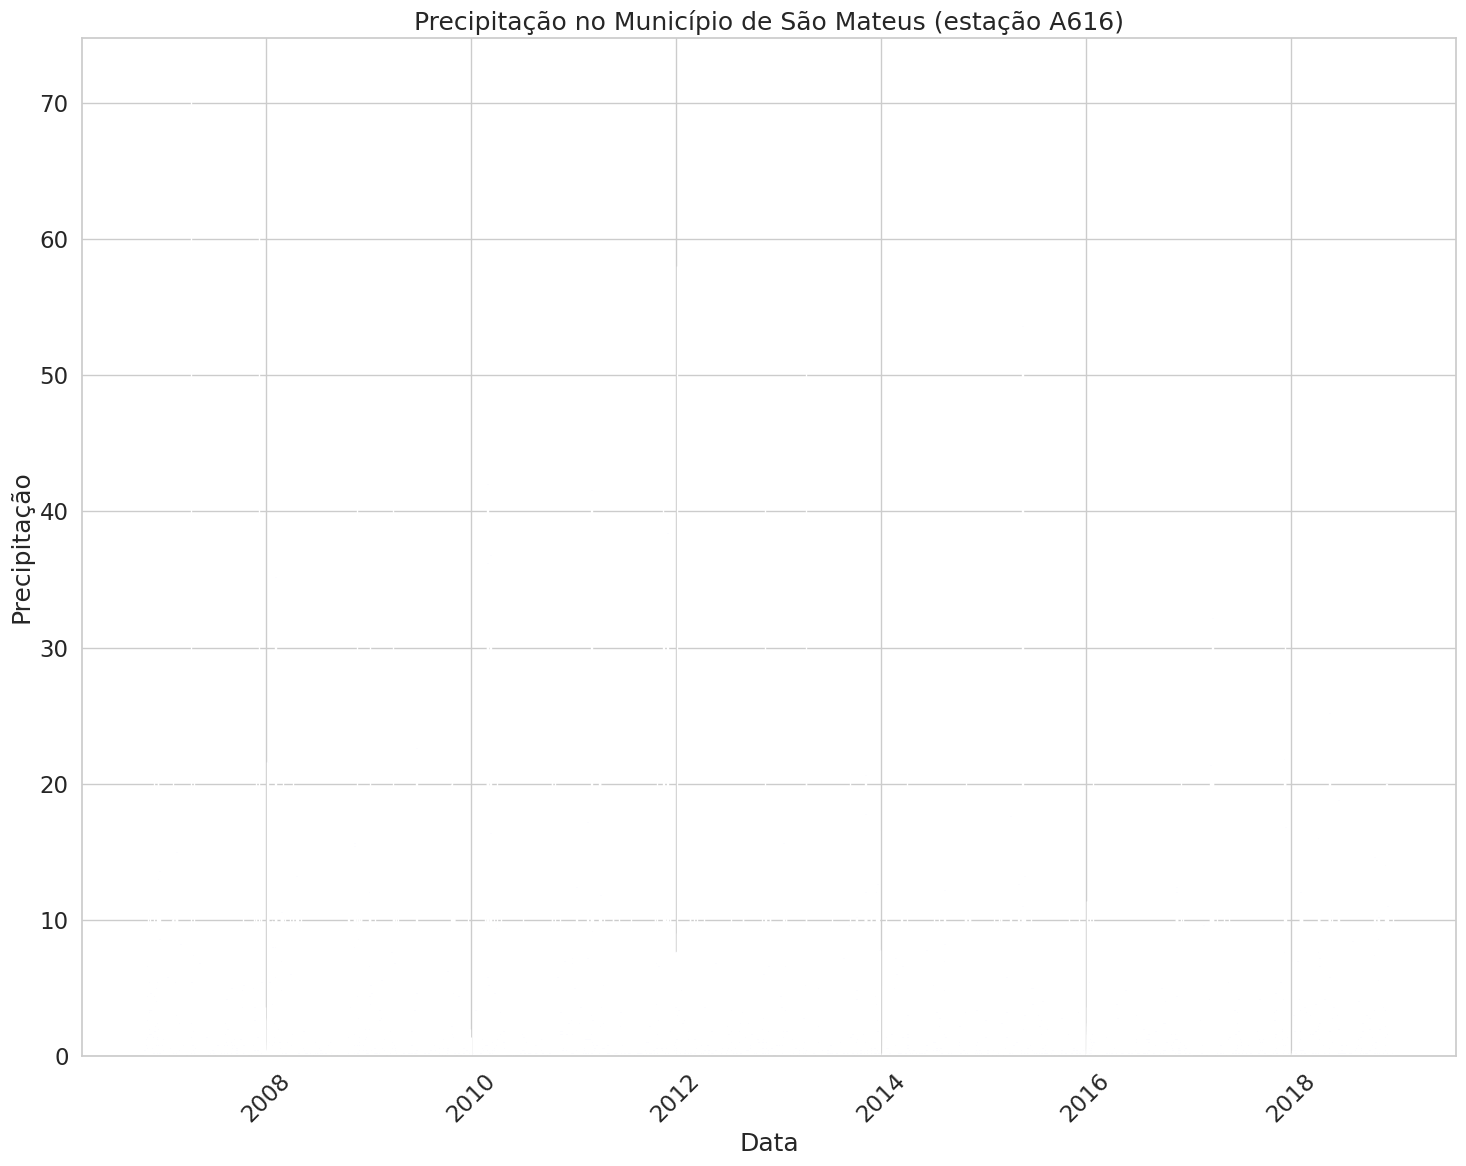

In [43]:
#Agora com fé em Deus esse código da tarefa vai funcionar
plt.ion()
plt.rcParams['figure.figsize'] = (15, 12)

fig, ax = plt.subplots()
# add the x-axis and the y-axis to the plot
ax.bar(teste_dt.index.values,
       teste_dt["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"],
       color="blue")
# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45)

# set title and labels for axes
ax.set(xlabel = "Data",
       ylabel = "Precipitação",
       title = "Precipitação no Município de São Mateus (estação A616)");
#plt.show()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))




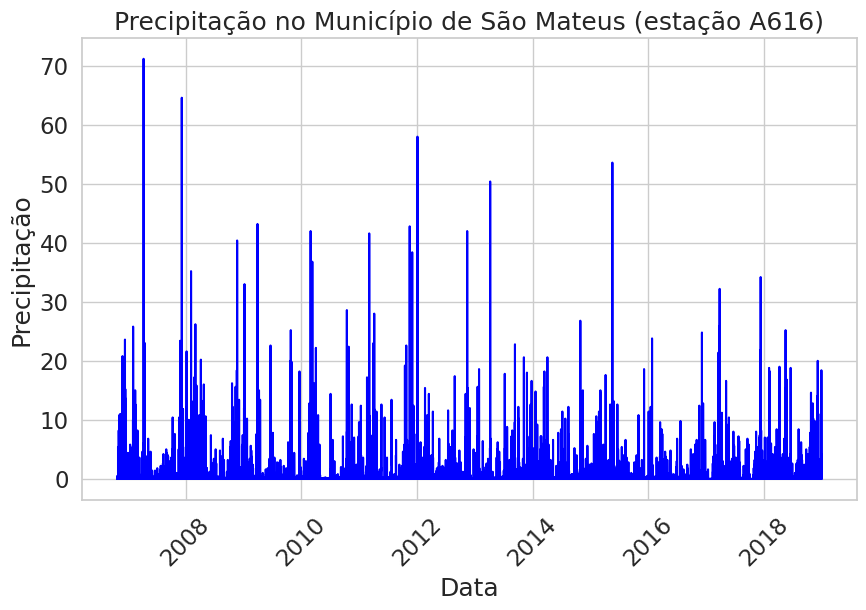

In [27]:
#Agora com fé em Deus esse código da tarefa vai funcionar
plt.ion()
plt.rcParams['figure.figsize'] = (10, 6)

fig, ax = plt.subplots()
# add the x-axis and the y-axis to the plot
ax.plot(teste_dt.index.values,
       teste_dt["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"],
       color="blue")
# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45)

# set title and labels for axes
ax.set(xlabel = "Data",
       ylabel = "Precipitação",
       title = "Precipitação no Município de São Mateus (estação A616)");
#plt.show()
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


Exercício 04
---
Crie 4 gráficos em barras da pluviosidade de todo o período de dados disponível reamostrado nas formas:

horária
diária
mensal
anual
Dicas:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
se necesssário, formate os rótulos do eixo x para ficar legígel
adicione título
adicione nome aos eixos x e y

In [46]:
#1° Tem que juntar os dados somanda, soma todas as horas e da dia, soma os dias e da os meses e etc.
teste_dt_dia = teste_dt.resample("D").sum() #resample para dia
teste_dt_dia.head()
teste_dt_dia_2007 = teste_dt_dia["2007"]



In [30]:
teste_dt_mes = teste_dt.resample("M").sum() #resample para mês
teste_dt_mes.head()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
data,,,,,,,,,,,,,,,,,,
2006-10-31,7.6,154181.0,154225.6,154141.8,113643.8,3614.9,3090.5,3685.9,3549.9,3152.0,3033.5,12898.0,12149.0,12537.0,19774.0,896.1,447.0,0.0
2006-11-30,338.8,723320.7,723506.3,723134.1,542588.8,17137.7,15178.4,17462.9,16846.5,15440.6,14927.3,62732.0,59752.0,61328.0,91510.0,4291.5,2102.6,0.0
2006-12-31,316.0,706562.1,706724.2,706391.8,558741.2,17519.9,15406.0,17841.8,17230.0,15690.8,15139.7,60457.0,57334.0,58949.0,84097.0,4056.1,1988.1,0.0
2007-01-31,49.6,750213.6,750400.5,750027.1,706051.0,19569.6,16661.8,19996.3,19185.7,16966.6,16363.0,61482.0,57802.0,59698.0,84212.0,4476.8,2190.0,0.0
2007-02-28,263.2,676267.2,676427.5,676105.3,569621.5,16939.7,14836.8,17290.5,16617.8,15129.9,14535.0,57632.0,54427.0,56138.0,95776.0,3120.5,1481.2,0.0


In [31]:
teste_dt_ano = teste_dt.resample("Y").sum() #resample para ano
teste_dt_ano.head()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
data,,,,,,,,,,,,,,,,,,
2006-12-31,662.4,1584063.8,1584456.1,1583667.7,1214973.8,38272.5,33674.9,38990.6,37626.4,34283.4,33100.5,136087.0,129235.0,132814.0,195381.0,9243.7,4537.7,0.0
2007-12-31,1047.6,8849977.1,8852034.4,8847918.9,7030916.0,206767.8,173060.0,211836.5,202070.3,177136.6,168881.7,724681.0,680693.0,703684.0,1228853.0,41627.3,20225.5,0.0
2008-12-31,1548.8,8807237.9,8808301.6,8804141.4,6276584.5,205344.9,172906.7,209809.4,201184.4,176659.1,169212.4,725739.0,684361.0,705730.0,661180.0,25758.6,12893.1,0.0
2009-12-31,1097.2,8826203.4,8828269.8,8824139.0,6500834.8,212539.1,179747.5,216989.1,208473.9,183296.7,176206.9,726247.0,685564.0,706730.0,1305979.0,45847.5,22494.5,0.0
2010-12-31,1045.0,7614742.6,7604451.4,7600788.1,6233459.5,183182.1,152920.5,186555.2,179320.6,155962.2,149392.6,617089.0,581180.0,600387.0,1104640.0,39730.2,19368.0,0.0


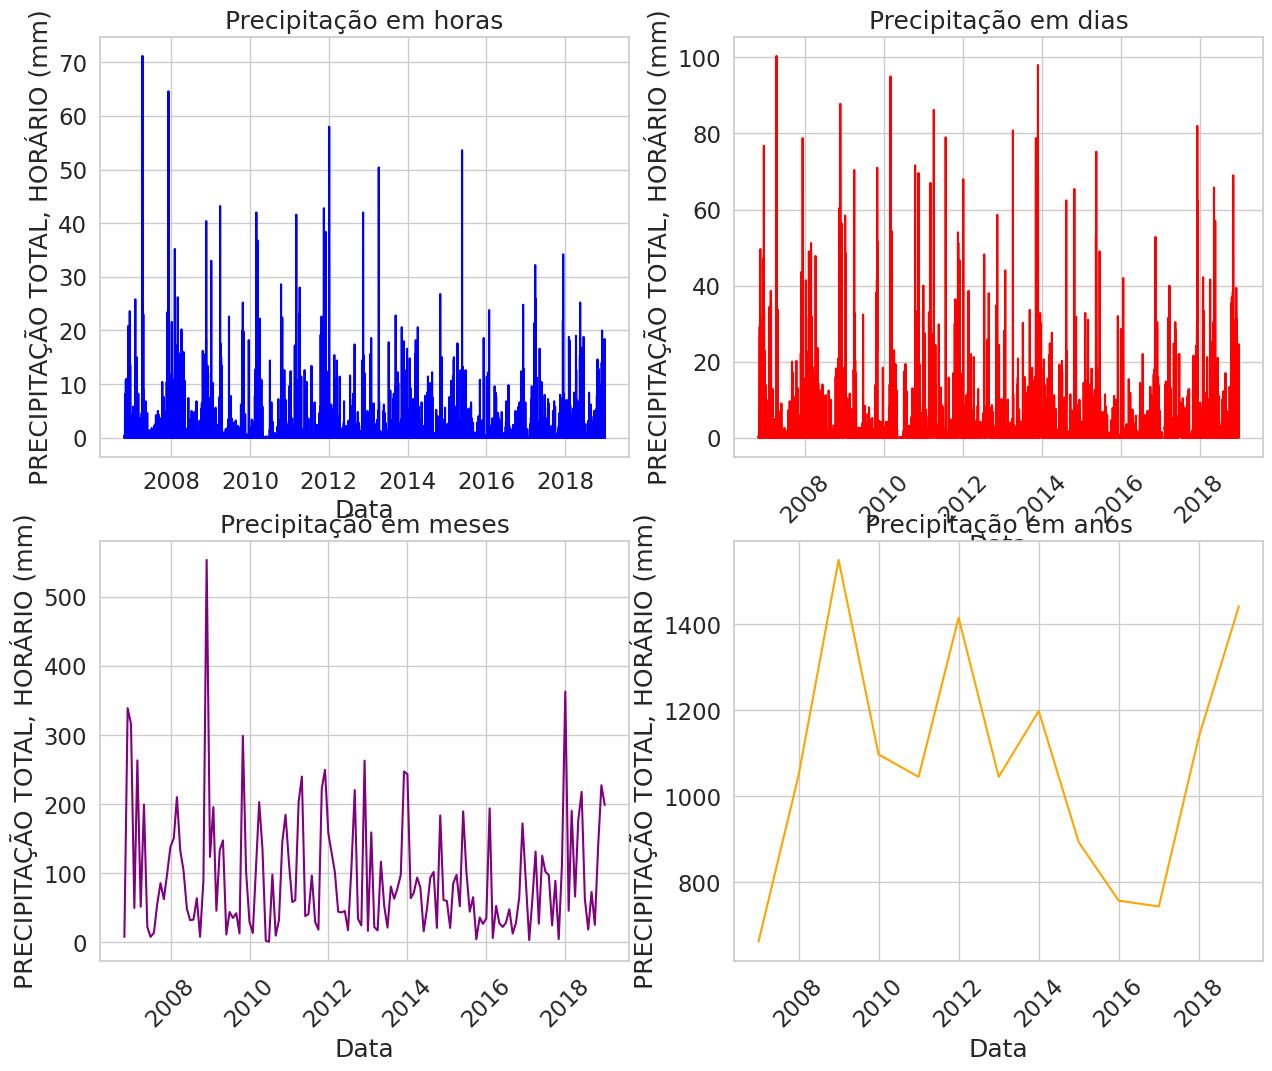

In [32]:
import matplotlib.dates as mdates
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.rcParams['figure.figsize'] = (50, 40)


ax1.plot(teste_dt.index.values,
       teste_dt["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"],
       color="blue")
ax1.set_title('Precipitação em horas')
ax1.set_xlabel("Data")
ax1.set_ylabel("PRECIPITAÇÃO TOTAL, HORÁRIO (mm)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.plot(teste_dt_dia.index.values,
       teste_dt_dia["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"],
       color="red")
ax2.set_title('Precipitação em dias')
ax2.set_xlabel("Data")
ax2.set_ylabel("PRECIPITAÇÃO TOTAL, HORÁRIO (mm)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.setp(ax2.get_xticklabels(), rotation=45)
ax3.plot(teste_dt_mes.index.values,
       teste_dt_mes["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"],
       color="purple")
ax3.set_title('Precipitação em meses')
ax3.set_xlabel("Data")
ax3.set_ylabel("PRECIPITAÇÃO TOTAL, HORÁRIO (mm)")
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.setp(ax3.get_xticklabels(), rotation=45)
ax4.plot(teste_dt_ano.index.values,
       teste_dt_ano["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"],
       color="orange")
ax4.set_title('Precipitação em anos')
ax4.set_xlabel("Data")
ax4.set_ylabel("PRECIPITAÇÃO TOTAL, HORÁRIO (mm)")
plt.setp(ax4.get_xticklabels(), rotation=45)
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))



Faça gráficos horários e diários de precipitação (tipo barras) e temperatura (tipo linha - coluna TEMPERATURA DO AR - BULBO SECO, HORARIA), no mesmo plot, tanto para:

o ano mais chuvoso
o ano menos chuvoso
Gráfico similar ao Desafio da Atividade Prática 02, que combina barras + linha.

A precipitação deve ser reamostrada pela soma, enquanto a temperatura deve ser reamostrada pela média.

In [37]:
#pelos ulimos gráficos deu pra notar que o ano mais chuvoso foi 2009 e o menos chuvoso 2007
#1° separar so os dados desses anos
teste_dt_mes_2009=teste_dt_mes["2009"]
teste_dt_mes_2007=teste_dt_mes["2007"]

#2° Agora usar a media ao inves da soma
teste_dt_dia_media = teste_dt.resample("M").median()
#teste_dt_dia_media["2009"].head()
teste_dt_2009_dia_media=teste_dt_dia_media["2009"]
teste_dt_2007_dia_media=teste_dt_dia_media["2007"]



In [38]:

teste_dt_2007_mes_media.head()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
data,,,,,,,,,,,,,,,,,,
2007-01-31,0.0,1008.6,1008.9,1008.4,1539.35,25.80,22.45,26.2,25.40,22.9,22.1,85.0,81.0,83.0,66.0,6.3,2.95,NaN
2007-02-28,0.0,1009.3,1009.5,1009.1,1292.05,24.70,22.20,25.1,24.30,22.6,21.8,90.0,85.0,87.0,102.5,4.3,2.00,NaN
2007-03-31,0.0,1010.5,1010.7,1010.3,1893.25,25.55,21.90,26.0,24.95,22.3,21.4,86.0,82.0,84.0,103.0,3.9,1.80,NaN
2007-04-30,0.0,1010.8,1011.0,1010.5,1329.20,24.20,21.70,24.7,23.80,22.2,21.3,90.0,86.0,88.0,188.5,4.0,1.80,NaN
2007-05-31,0.0,1012.1,1012.3,1011.9,1163.75,22.20,19.40,22.6,21.80,19.8,18.9,88.0,82.0,86.0,191.0,4.3,2.00,NaN


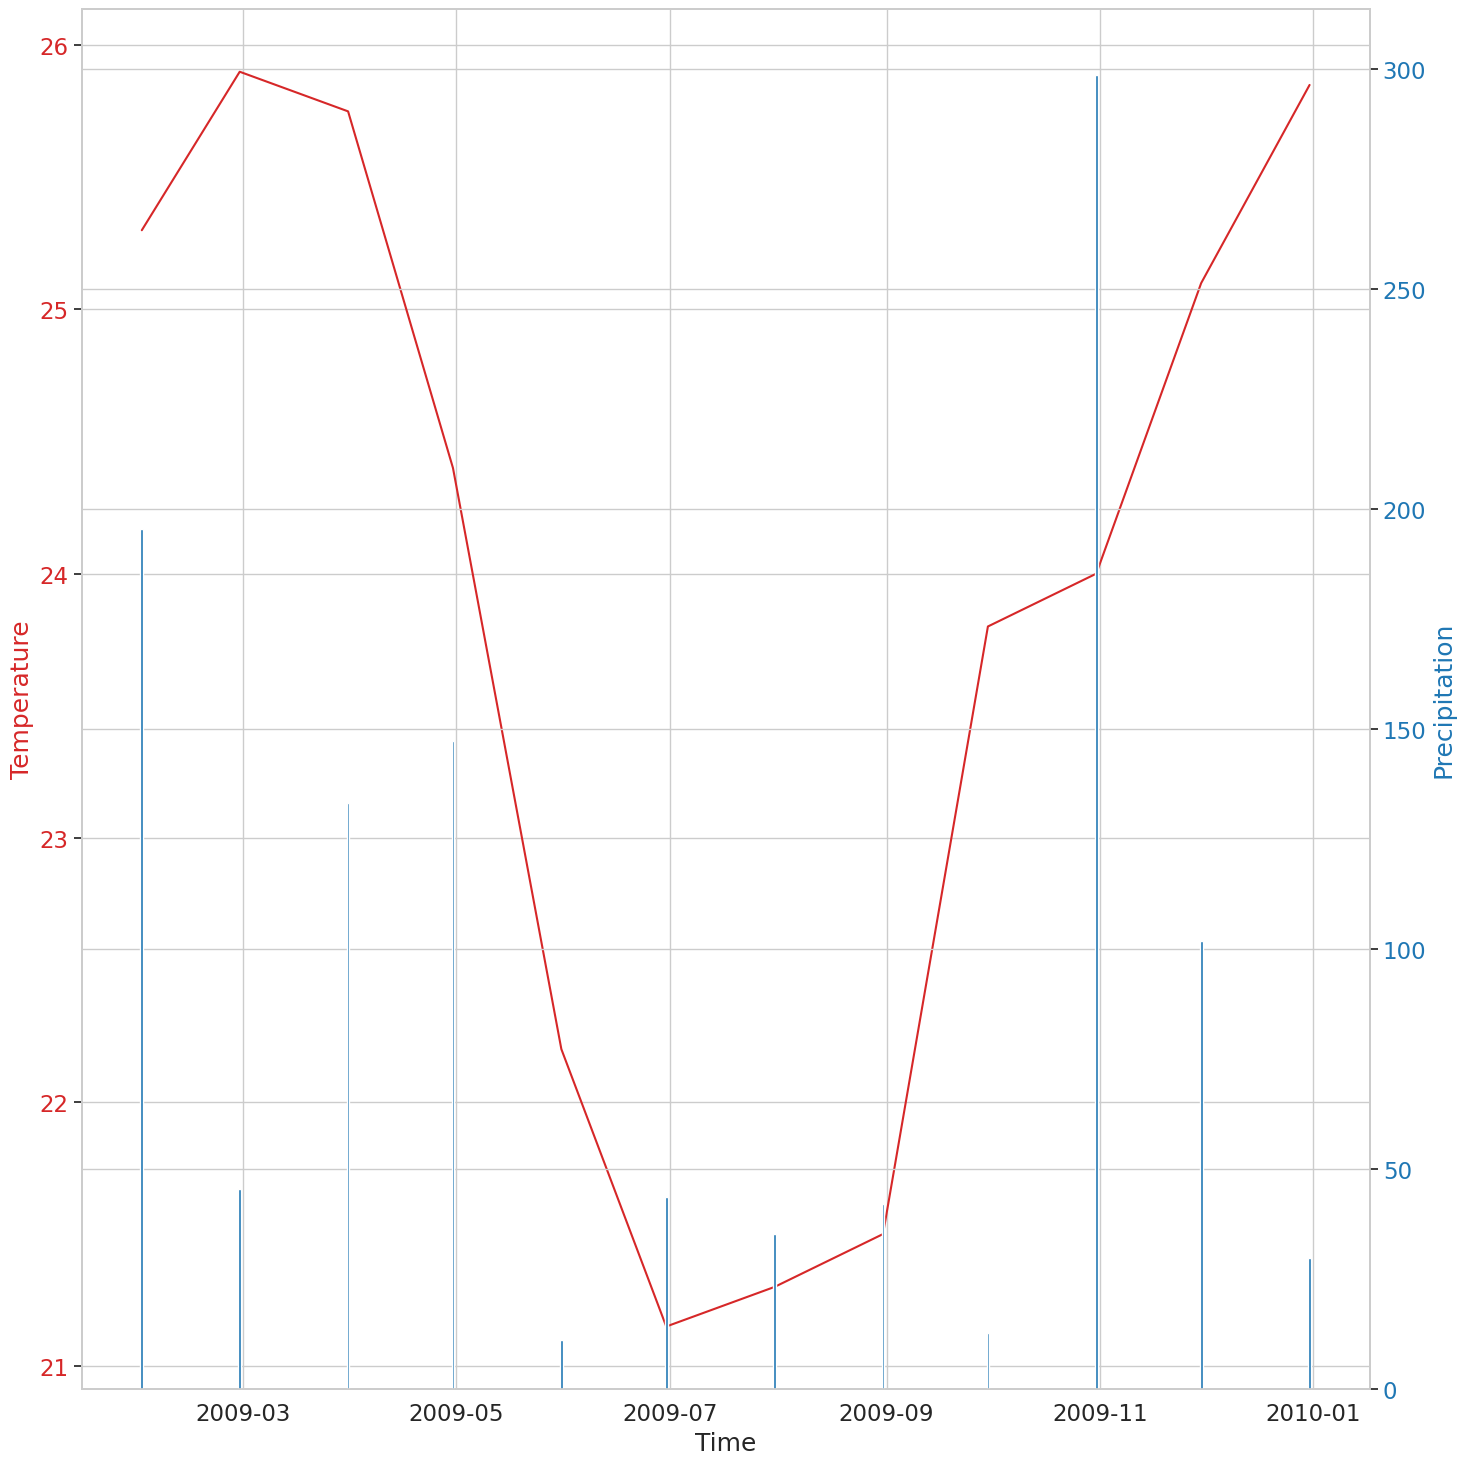

In [42]:

#Agora vamo tentar plotar


# Cria uma figura e um conjunto de subplots.
fig, ax1 = plt.subplots(figsize=(15, 15))

# Define a cor para o eixo y da esquerda que irá plotar a temperatura
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature', color=color)
ax1.plot(teste_dt_2009_dia_media.index, teste_dt_2009_dia_media['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Cria um segundo eixo y compartilhando o mesmo eixo x
ax2 = ax1.twinx()

# Define a cor para o eixo y da direita que irá plotar a precipitação
color = 'tab:blue'
ax2.set_ylabel('Precipitation', color=color)
ax2.bar(teste_dt_mes_2009.index, teste_dt_mes_2009['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Ajusta o layout para que tudo caiba
fig.tight_layout()
plt.show()

In [48]:
teste_dt_dia_2007.head()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
data,,,,,,,,,,,,,,,,,,
2007-01-01,7.2,24287.4,24292.5,24281.9,21275.8,593.5,520.2,606.9,577.2,531.0,505.7,2079.0,1941.0,2012.0,3253.0,132.9,53.4,0.0
2007-01-02,13.8,24304.9,24310.0,24299.8,13130.5,586.4,532.4,595.6,576.2,541.9,523.8,2155.0,2057.0,2102.0,2756.0,121.8,53.4,0.0
2007-01-03,0.0,24288.3,24294.7,24284.4,18193.9,613.9,518.1,621.9,604.6,525.9,509.0,1944.0,1846.0,1894.0,1666.0,144.3,71.7,0.0
2007-01-04,0.0,24240.5,24247.2,24236.1,20589.4,595.5,515.5,608.3,583.9,525.0,506.6,2037.0,1926.0,1983.0,2321.0,133.1,66.2,0.0
2007-01-05,0.4,24221.3,24226.2,24216.8,14396.4,597.3,533.7,608.9,586.2,544.1,525.3,2118.0,1992.0,2052.0,2093.0,125.5,59.5,0.0


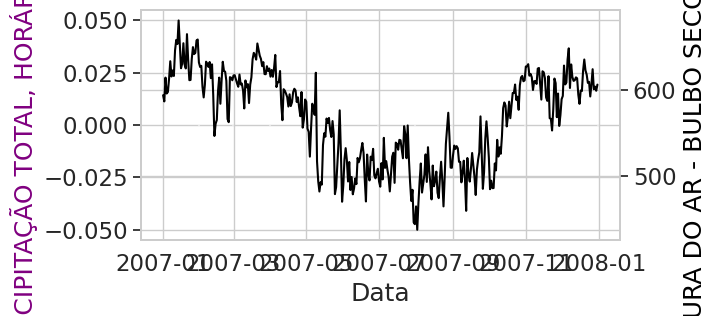

In [53]:
fig, ax1 = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Cria o gráfico de barras
ax1.bar(teste_dt_2007_dia_media.index, teste_dt_2007_dia_media['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], color='purple')
ax1.set_xlabel('Data')
ax1.set_ylabel('PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', color='purple')

# Cria o segundo eixo para o gráfico de linha
ax2 = ax1.twinx()
ax2.plot(teste_dt_dia_2007.index, teste_dt_dia_2007['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], color='black')
ax2.set_ylabel('TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', color='black')

plt.show()


Parte 2 - vazão e período de retorno
---
Plot 1
Use pandas to open and process the data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.txt txt file. Using this data, create a plot of monthly maximum stream discharge from 1990-2014. Document your steps used to process the data in a markdown cell BELOW the plot use pandas, make sure the dataframe has a datetime index calculate a monthly max value

Subset the data to the time period: 1990-2014 using pandas syntax ["":""]. This means that your date column should be setup as an index.

In [54]:
#1°) Importar o que usaremos
!pip install --upgrade matplotlib --force
!pip install hydrofunctions
import hydrofunctions as hf
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# set standard plot parameters for uniform plotting
plt.ion()
plt.rcParams['figure.figsize'] = (11, 6)

# prettier plotting with seaborn
import seaborn as sns;
#sns.set(font_scale=1.5)
#sns.set_style("whitegrid")

#%matplotlib inline
# Set working directory
# os.chdir('C:/Users/leomi/Documents') # LOCAL
#os.chdir('/content') # COLAB

# make `data` directory
#os.mkdir('data')

  Using cached matplotlib-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 105.9 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 31.9 MB/s eta 0:00:00
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uni

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.5 MB/s eta 0:00:00


In [55]:
# define the USGS gage site number and date range
site = "06730200"
start = "1986-01-01"
end = "2013-12-31"

# then request data for that site and time period
longmont_resp = hf.get_nwis(site, 'dv', start, end, parameterCd='00060')
hf.get_nwis(site, 'dv').json()
longmont_discharge = hf.extract_nwis_df(longmont_resp.json())
longmont_discharge = longmont_discharge[0] # COLAB
longmont_discharge.head()

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06730200&parameterCd=00060&startDT=1986-01-01&endDT=2013-12-31
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06730200


,USGS:06730200:00060:00003,USGS:06730200:00060:00003_qualifiers
datetimeUTC,,
1986-10-01 00:00:00+00:00,30.0,A
1986-10-02 00:00:00+00:00,30.0,A
1986-10-03 00:00:00+00:00,30.0,A
1986-10-04 00:00:00+00:00,30.0,A
1986-10-05 00:00:00+00:00,30.0,A


In [56]:
longmont_discharge["month"]=longmont_discharge.index.year
longmont_discharge_month_max = longmont_discharge.resample('M').max()
longmont_discharge_month_max.head()
url = "https://nwis.waterdata.usgs.gov/nwis/peak?site_no=06730500&agency_cd=USGS&format=rdb"
download_path = "data/month-peak-flow.txt"
urllib.request.urlretrieve(url, download_path)
longmont_discharge_month_max = longmont_discharge.resample('AS').max()
longmont_discharge_month_max.head()

,USGS:06730200:00060:00003,USGS:06730200:00060:00003_qualifiers,month
datetimeUTC,,,
1986-01-01 00:00:00+00:00,77.0,A,1986
1987-01-01 00:00:00+00:00,887.0,A,1987
1988-01-01 00:00:00+00:00,564.0,A,1988
1989-01-01 00:00:00+00:00,331.0,A,1989
1990-01-01 00:00:00+00:00,402.0,A,1990


In [57]:
# open the data using pandas
usgs_annual_max = pd.read_csv(download_path,
                              skiprows = 71,
                              header=[1,2],
                              sep='\t',
                              parse_dates = [2])
# notice that the data now have 2 header rows. We only need one - the first row
usgs_annual_max

,agency_cd,site_no,peak_dt,peak_tm,peak_va,peak_cd,gage_ht,gage_ht_cd,year_last_pk,ag_dt,ag_tm,ag_gage_ht,ag_gage_ht_cd
,5s,15s,10d,6s,8s,33s,8s,27s,4s,10d,6s,8s,27s
0,USGS,6730500,1927-07-29,06:00,407.0,5,3.00,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,6730500,1928-06-04,09:00,694.0,5,3.84,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,6730500,1929-07-23,15:00,530.0,5,3.40,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,6730500,1930-08-18,05:00,353.0,5,2.94,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,6730500,1931-05-29,09:00,369.0,5,2.88,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,USGS,6730500,2018-05-03,18:30,666.0,5,11.76,2.0,NaN,2018-06-19,1815.0,12.09,NaN
67,USGS,6730500,2019-07-06,11:00,680.0,5,12.38,NaN,NaN,NaN,NaN,NaN,NaN
68,USGS,6730500,2020-05-25,01:45,532.0,5,11.85,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# drop one level of index
usgs_annual_max.columns = usgs_annual_max.columns.droplevel(1)
# finally set the date column as the index
usgs_annual_max = usgs_annual_max.set_index(['peak_dt'])

# optional - remove columns we don't need - this is just to make the lesson easier to read
# you can skip this step if you want
usgs_annual_max = usgs_annual_max.drop(["gage_ht_cd", "year_last_pk","ag_dt", "ag_gage_ht", "ag_tm", "ag_gage_ht_cd"], axis=1)

# view cleaned dataframe
usgs_annual_max.head()

,agency_cd,site_no,peak_tm,peak_va,peak_cd,gage_ht
peak_dt,,,,,,
1927-07-29,USGS,6730500,06:00,407.0,5,3.00
1928-06-04,USGS,6730500,09:00,694.0,5,3.84
1929-07-23,USGS,6730500,15:00,530.0,5,3.40
1930-08-18,USGS,6730500,05:00,353.0,5,2.94
1931-05-29,USGS,6730500,09:00,369.0,5,2.88


In [59]:
# add a year column to the data for easier plotting
usgs_annual_max["month"] = usgs_annual_max.index.month

# are there any years that have two entries?
usgs_annual_max[usgs_annual_max.duplicated(subset="month")==True]

,agency_cd,site_no,peak_tm,peak_va,peak_cd,gage_ht,month
peak_dt,,,,,,,
1929-07-23,USGS,6730500,15:00,530.0,5,3.40,7
1932-07-13,USGS,6730500,10:00,128.0,5,1.86,7
1933-05-04,USGS,6730500,NaN,670.0,5,NaN,5
1934-05-10,USGS,6730500,NaN,388.0,5,3.00,5
1935-05-28,USGS,6730500,NaN,1110.0,5,4.62,5
...,...,...,...,...,...,...,...
2018-05-03,USGS,6730500,18:30,666.0,5,11.76,5
2019-07-06,USGS,6730500,11:00,680.0,5,12.38,7
2020-05-25,USGS,6730500,01:45,532.0,5,11.85,5


In [60]:
# remove duplicate years - keep the max discharge value
usgs_month_max = usgs_annual_max.sort_values('peak_va', ascending=False).drop_duplicates('month').sort_index()
# if this returns no results you have remove duplicated successfully!
usgs_month_max[usgs_annual_max.duplicated(subset="month")==True]

,agency_cd,site_no,peak_tm,peak_va,peak_cd,gage_ht,month
peak_dt,,,,,,,
1942-04-24,USGS,6730500,NaN,1790.0,5,4.81,4
1947-06-23,USGS,6730500,NaN,2040.0,5,5.22,6
1951-08-03,USGS,6730500,NaN,1540.0,5,5.00,8
1995-05-17,USGS,6730500,NaN,2300.0,5,5.29,5
2000-07-17,USGS,6730500,07:00,1230.0,5,4.33,7
2013-09-13,USGS,6730500,NaN,8910.0,"1,2",NaN,9


In [61]:
# plot calculated vs USGS annual max flow values
fig, ax = plt.subplots(figsize = (11,9))
ax.plot(usgs_annual_max["month"],
        usgs_annual_max["peak_va"],
        color = "purple",
        linestyle=':',
        marker='o',
        label = "Instantaneous Value")
ax.plot(usgs_month_max["month"],
        usgs_month_max["gage_ht"],
        color = "lightgrey",
        linestyle=':',
        marker='o', label = "Mean Daily Value")
ax.legend()
ax.set_title("Month Maxima - Downloaded Instantaneous vs. Derived Daily Peak Flows");


Plot 2
---
Use pandas to open and process the data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.txt txt file. Using this data, create a plot of daily maximum stream discharge from Aug 01, 2013 to October 01, 2013. Document your steps used to process the data in a markdown cell BELOW the plot use pandas, make sure the dataframe has a datetime index calculate a monthly max value

Subset the data temporally (by time) using pandas syntax ["":""]. This means that your date column should be setup as an index in pandas.

In [62]:
#Fazer a mesca coisa do exercício anterios, mas agora usando dia
import pandas as pd
import matplotlib.pyplot as plt

# Set the site number, start date, and end date
site = "06730200"
start = "2013-08-01"
end = "2013-10-01"

longmont_discharge["day"]=longmont_discharge.index.year
longmont_discharge_day_max = longmont_discharge.resample('D').max()
longmont_discharge_day_max.head()
url = "https://nwis.waterdata.usgs.gov/nwis/peak?site_no=06730500&agency_cd=USGS&format=rdb"
download_path = "data/month-peak-flow.txt"
urllib.request.urlretrieve(url, download_path)
longmont_discharge_day_max = longmont_discharge.resample('D').max()
longmont_discharge_day_max.head()
# open the data using pandas
usgs_dia_max = pd.read_csv(download_path,
                              skiprows = 71,
                              header=[1,2],
                              sep='\t',
                              parse_dates = [2])
# notice that the data now have 2 header rows. We only need one - the first row
usgs_dia_max
# drop one level of index
usgs_dia_max.columns = usgs_dia_max.columns.droplevel(1)
# finally set the date column as the index
usgs_dia_max = usgs_dia_max.set_index(['peak_dt'])

# optional - remove columns we don't need - this is just to make the lesson easier to read
# you can skip this step if you want
usgs_dia_max = usgs_dia_max.drop(["gage_ht_cd", "year_last_pk","ag_dt", "ag_gage_ht", "ag_tm", "ag_gage_ht_cd"], axis=1)

# view cleaned dataframe

# add a year column to the data for easier plotting
usgs_dia_max["day"] = usgs_dia_max.index.day

# are there any years that have two entries?
##usgs_dia_max[usgs_annual_max.duplicated(subset="day")==True]
# remove duplicate years - keep the max discharge value
#usgs_dia_max = usgs_dia_max.sort_values('peak_va', ascending=False).drop_duplicates('day').sort_index()
# if this returns no results you have remove duplicated successfully!
#usgs_dia_max[usgs_annual_max.duplicated(subset="day")==True]



fig, ax = plt.subplots(figsize = (11,9))
ax.plot(usgs_dia_max["day"],
        usgs_dia_max["peak_va"],
        color = "purple",
        linestyle=':',
        marker='o',
        label = "Instantaneous Value")
ax.plot(usgs_dia_max["day"],
        usgs_dia_max["gage_ht"],
        color = "lightgrey",
        linestyle=':',
        marker='o', label = "Mean Daily Value")
ax.legend()
ax.set_title("Daily Maxima - Downloaded Instantaneous vs. Derived Daily Peak Flows");



Plot 3
---
Use the data/precipitation/805333-precip-daily-1948-2013.csv file to create a plot of total (sum) monthly precipitation from 1990 to 2014.

Subset the data using pandas syntax ["":""]. This means that your date column should be setup as an index.

label the x and y axis of your plot with appropriate units
# Make sure the date labels on your x-axis are easily readable

In [63]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")
# Download the data
data = et.data.get_data('colorado-flood')
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Define relative path to file with hourly precip
file_path = os.path.join("data", "colorado-flood",
                         "precipitation",
                         "805333-precip-daily-1948-2013.csv")
Chuva_1990_2014 = pd.read_csv(file_path,
                                      parse_dates=['DATE'],
                                      index_col=['DATE'],
                                      na_values=['999.99'])


# View first few rows
Chuva_1990_2014.head()
#Agora tem que filtrar o paranaue
start_date = pd.to_datetime('01-01-1990')
end_date = pd.to_datetime('12-31-2014')
Chuva_1990_2014 = Chuva_1990_2014[start_date:end_date]

#Faz a soma e vou mudar de nome
Chuva_1990_2014_soma = Chuva_1990_2014.resample('M').sum()
Chuva_1990_2014_soma.head()

#Agora é plotar
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Chuva_1990_2014_soma.index, Chuva_1990_2014_soma['HPCP'])
ax.set_xlabel('Year')
ax.set_ylabel('Total monthly precipitation (mm)')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()


Extracted output to /root/earth-analytics/data/colorado-flood/.


Plot 4:
---
Use the data/precipitation/805333-precip-daily-1948-2013.csv file. Create a plot of Daily total precipitation for aug 1 - October 1 2013. Use pandas to import and process your data. Make sure the dataframe has a datetime index

Subset the data using pandas syntax ["":""]. This means that your date column should be setup as an index.

In [64]:
#Essa é quase igual a outra, mas ao inves de do mes é o dia e filtrar datas diferentes tbm
start_date = pd.to_datetime('08-01-2013')
end_date = pd.to_datetime('10-01-2013')
chuva_diaria_2013 = Chuva_1990_2014[start_date:end_date]
chuva_diaria_2013.head()
#Faz a sominha diaria e corre pro abraço minha máquina de vencer
chuva_diaria_2013_soma = chuva_diaria_2013.resample('D').sum()


#Agora é plotar
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(chuva_diaria_2013_soma.index, chuva_diaria_2013_soma['HPCP'])
ax.set_xlabel('Year')
ax.set_ylabel('Total daily precipitation (mm)')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()



Plot 5a & b - Return Period for Stream Discharge
---
Step 1
Following the activity that we did together in class (or that you can view here), use the hydrofunctions packages to import dv (daily value) stream discharge data from the USGS site: 06730500 into python. Use the start and end time periods listed below.

site = "06730500"
start = '1946-05-10'
end = '2018-08-29'
Calculate the annual maximum discharge value from this data.

In [65]:
#importa tudo de novo (pra não te que rodar o código todo)
!pip install hydrofunctions
import hydrofunctions as hf
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
#Seguir o passo a passo da atividade
# define the site number and start and end dates that you are interested in
site = "06730500"
start = '1946-05-10'
end = '2018-08-29'
# then request data for that site and time period
longmont_resp = hf.get_nwis(site, 'dv', start, end, parameterCd='00060')
# hf.get_nwis_property(longmont_resp)
# get metadata about the data
hf.get_nwis(site, 'dv').json()
# get the data in a pandas dataframe format
longmont_discharge = hf.extract_nwis_df(longmont_resp.json())
longmont_discharge = longmont_discharge[0] # COLAB
longmont_discharge.head()
# rename columns
longmont_discharge.columns = ["discharge", "flag"]
# view first 5 rows
longmont_discharge.tail()
longmont_discharge["discharge"]
# add a year column to your longmont discharge data
longmont_discharge["year"]=longmont_discharge.index.year
# Calculate annual max by resasmpling
longmont_discharge_annual_max = longmont_discharge.resample('AS').max()
longmont_discharge_annual_max.head()

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06730500&parameterCd=00060&startDT=1946-05-10&endDT=2018-08-29
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06730500


,discharge,flag,year
datetimeUTC,,,
1946-01-01 00:00:00+00:00,99.0,A,1946
1947-01-01 00:00:00+00:00,1930.0,A,1947
1948-01-01 00:00:00+00:00,339.0,A,1948
1949-01-01 00:00:00+00:00,2010.0,hf.missing,1949
1950-01-01 00:00:00+00:00,NaN,hf.missing,1950


In [70]:
import hydrofunctions as hf
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# set standard plot parameters for uniform plotting
plt.ion()
plt.rcParams['figure.figsize'] = (11, 6)

# prettier plotting with seaborn
import seaborn as sns;
#sns.set(font_scale=1.5)
#sns.set_style("whitegrid")

#%matplotlib inline


# download usgs annual max data from figshare
url = "https://nwis.waterdata.usgs.gov/nwis/peak?site_no=06730500&agency_cd=USGS&format=rdb"
download_path = "/content/data/annual-peak-flow.txt"
urllib.request.urlretrieve(url, download_path)

('/content/data/annual-peak-flow.txt',
 <http.client.HTTPMessage at 0x7b0a9cb75cf0>)

In [71]:
# sort data smallest to largest
longmont_discharge_sorted = longmont_discharge.sort_values(by = "discharge")
# count total obervations
n = longmont_discharge_sorted.shape[0]
# add a numbered column 1 -> n to use in return calculation for rank
longmont_discharge_sorted.insert(0, 'rank', range(1, 1 + n))
# calculate probability - note you may need to adjust this value based upon the time period of your data
longmont_discharge_sorted["probability"] = ((n - longmont_discharge_sorted["rank"] + 1) / (n + 1))
longmont_discharge_sorted["return-years"] = (1 / longmont_discharge_sorted["probability"])

In [72]:
# Create a function from the workflow below

## add an argument for annual vs daily...
def calculate_return(df, colname):
    '''
    Add Documentation Here


    '''
    # sort data smallest to largest
    sorted_data = df.sort_values(by = colname)
    # count total obervations
    n = sorted_data.shape[0]
    # add a numbered column 1 -> n to use in return calculation for rank
    sorted_data.insert(0, 'rank', range(1, 1 + n))
    # calculate probability
    sorted_data["probability"] = (n - sorted_data["rank"] + 1) / (n + 1)
    # calculate return - data are daily to then divide by 365?
    sorted_data["return-years"] = (1 / sorted_data["probability"])

    return(sorted_data)

In [73]:
longmont_prob = calculate_return(longmont_discharge, "discharge")
longmont_prob.head()


,rank,discharge,flag,year,probability,return-years
datetimeUTC,,,,,,
1954-08-10 00:00:00+00:00,1,0.0,A,1954,0.999962,1.000038
1946-07-05 00:00:00+00:00,2,0.0,A,1946,0.999924,1.000076
1946-06-25 00:00:00+00:00,3,0.0,A,1946,0.999886,1.000114
1954-08-08 00:00:00+00:00,4,0.1,A,1954,0.999849,1.000151
1955-04-25 00:00:00+00:00,5,0.2,A,1955,0.999811,1.000189


In [74]:
# open the data using pandas
usgs_annual_max = pd.read_csv(download_path,
                              skiprows = 71,
                              header=[1,2],
                              sep='\t',
                              parse_dates = [2])
# drop one level of index
usgs_annual_max.columns = usgs_annual_max.columns.droplevel(1)
# finally set the date column as the index
usgs_annual_max = usgs_annual_max.set_index(['peak_dt'])

# optional - remove columns we don't need - this is just to make the lesson easier to read
# you can skip this step if you want
usgs_annual_max = usgs_annual_max.drop(["gage_ht_cd", "year_last_pk","ag_dt", "ag_gage_ht", "ag_tm", "ag_gage_ht_cd"], axis=1)

# view cleaned dataframe
usgs_annual_max.head()
# add a year column to the data for easier plotting
usgs_annual_max["year"] = usgs_annual_max.index.year

# are there any years that have two entries?
usgs_annual_max[usgs_annual_max.duplicated(subset="year")==True]
# remove duplicate years - keep the max discharge value
usgs_annual_max = usgs_annual_max.sort_values('peak_va', ascending=False).drop_duplicates('year').sort_index()
# if this returns no results you have remove duplicated successfully!
usgs_annual_max[usgs_annual_max.duplicated(subset="year")==True]
# calculate the same thing using the USGS annual max data
usgs_annual_prob = calculate_return(usgs_annual_max, "peak_va")
usgs_annual_prob

,rank,agency_cd,site_no,peak_tm,peak_va,peak_cd,gage_ht,year,probability,return-years
peak_dt,,,,,,,,,,
1954-01-14,1,USGS,6730500,12:30,26.0,"2,5",NaN,1954,0.985714,1.014493
1932-07-13,2,USGS,6730500,10:00,128.0,5,1.86,1932,0.971429,1.029412
1940-07-03,3,USGS,6730500,NaN,174.0,5,2.34,1940,0.957143,1.044776
1946-07-19,4,USGS,6730500,NaN,178.0,5,2.39,1946,0.942857,1.060606
2002-05-24,5,USGS,6730500,09:15,238.0,5,2.60,2002,0.928571,1.076923
...,...,...,...,...,...,...,...,...,...,...
1983-05-19,65,USGS,6730500,NaN,2090.0,5,4.82,1983,0.071429,14.000000
2015-05-09,66,USGS,6730500,11:30,2240.0,5,15.36,2015,0.057143,17.500000
1995-05-17,67,USGS,6730500,NaN,2300.0,5,5.29,1995,0.042857,23.333333


Plot 5A
discharge of the x-axis and probability on the y-axis for each dataset (one plot)

In [75]:
# Compare both datasets
fig, ax = plt.subplots(figsize = (11,6) )
usgs_annual_prob.plot.scatter(x="peak_va",
                              y="probability",
                              title="Probability ",
                              ax=ax,
                              color='purple',
                              fontsize=16,
                              logy= True,
                              label="USGS Annual Max Calculated")
longmont_prob.plot.scatter(y="probability",
                           x="discharge",
                           title="Probability ",
                           ax=ax,
                           color='grey',
                           fontsize=16,
                           logy= True,
                           label="Daily Mean Calculated")
ax.legend(frameon = True,
          framealpha = 1)
ax.set_ylabel("Probability")
ax.set_xlabel("Discharge Value (CFS)")
ax.set_title("Probability of Discharge Events \n USGS Annual Max Data Compared to Daily Mean Calculated Annual Max")
plt.show()

Plot 5B
Return period of the x-axis and Discharge (CFS) on the y-axis for each dataset (one plot)

In [76]:

fig, ax = plt.subplots(figsize = (11,6) )
longmont_prob.plot.scatter(y ="discharge",
                         x="return-years",
                         title="Return Period (Years)",
                         ax=ax,
                         color='purple',
                         fontsize=16,
                         label="Daily Mean Calculated")
usgs_annual_prob.plot.scatter(y ="peak_va",
                              x="return-years",
                              title = "Return Period (Years)",
                              ax=ax,
                              color='grey',
                              fontsize=16,
                              label="USGS Annual Max")
ax.legend(frameon = True,
          framealpha = 1)
ax.set_xlabel("Return Period (Years)")
ax.set_ylabel("Discharge Value (CFS)");
plt.show()

Plot 6 a & b
---
Create the same plots that you created above using the data/colorado-flood/precipitation/805333-precip-daily-1948-2013.csv data. For this plot you will not have a annual max file from USGS. Instead you will create both data sets.

6.1) Daily Sum Data
---
Summarize or resample the precipitation data to a Daily (D) sum.
Use the calculate_return function to calculate the return and probability for the data
Be sure to scale the return-years and probability column as we did with the discharge data. This means you will divide the return-years column by 365 and multiple the probability column by 365.

In [77]:
# Import necessary packages
!pip install earthpy
!pip install hydrofunctions
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et
%matplotlib inline

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")
# Download the data
data = et.data.get_data('colorado-flood')
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Define relative path to file with hourly precip
file_path = os.path.join("data", "colorado-flood",
                         "precipitation",
                         "805333-precip-daily-1948-2013.csv")
Chuva_1948_2013 = pd.read_csv(file_path,
                                      parse_dates=['DATE'],
                                      index_col=['DATE'],
                                      na_values=['999.99'])
Chuva_1948_2013.head()


,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
1948-08-01 01:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.00,g,
1948-08-02 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.05,,
1948-08-03 09:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.01,,
1948-08-03 14:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,
1948-08-03 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,


In [78]:
# resample the data by total precipitation of each day
precip_daily_sum = Chuva_1948_2013.resample("D").sum()

#Ve que que deu
precip_daily_sum.head()




,HPCP
DATE,
1948-08-01,0.00
1948-08-02,0.05
1948-08-03,0.07
1948-08-04,0.14
1948-08-05,0.02


6.2) Annual Max Data
---
Using the daily sum data that you calculated above, calculate the annual max total daily precipitation value.
Then calculate the return and probability using the calculate_return function on the annual max data.

In [79]:
# Calculate the annual max total daily precipitation value

annual_max = precip_daily_sum.resample('Y').max()

from scipy.stats import genextreme as gev
import numpy as np

def calculate_return(data):
    # Fit a Generalized Extreme Value (GEV) distribution to the data
    params = gev.fit(data)

    # Calculate the return period for each data point
    return_years = 1.0 / (1.0 - np.exp(-1.0 * (365.25 / data.count())))

    # Calculate the probability of each data point
    probabilities = 1.0 - 1.0 / return_years

    # Scale the return period and probability columns
    return_years = return_years / 365.0
    probabilities = probabilities * 365.0

    # Return a dataframe with the return period and probability columns
    return pd.DataFrame({'Return Period (years)': return_years, 'Probability': probabilities}, index=data.index)

# Calculate the return period and probability for the daily sum data
daily_sum_return = calculate_return(precip_daily_sum['HPCP'])

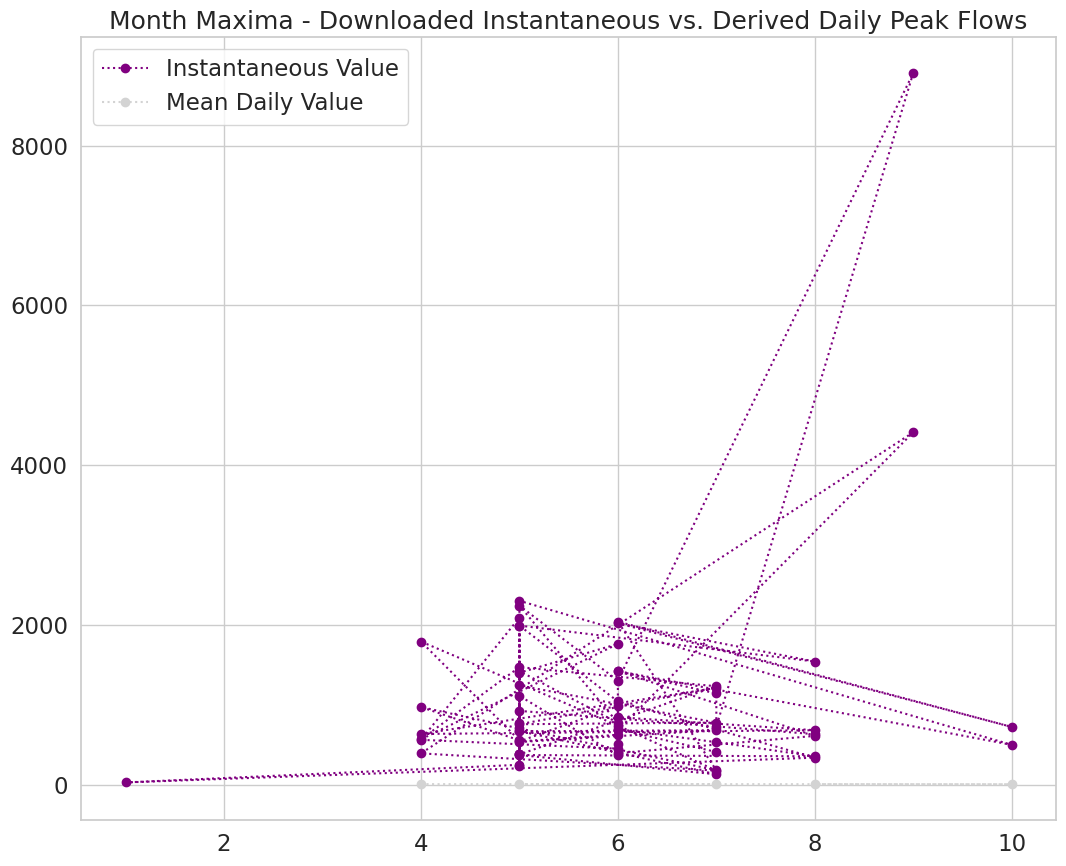

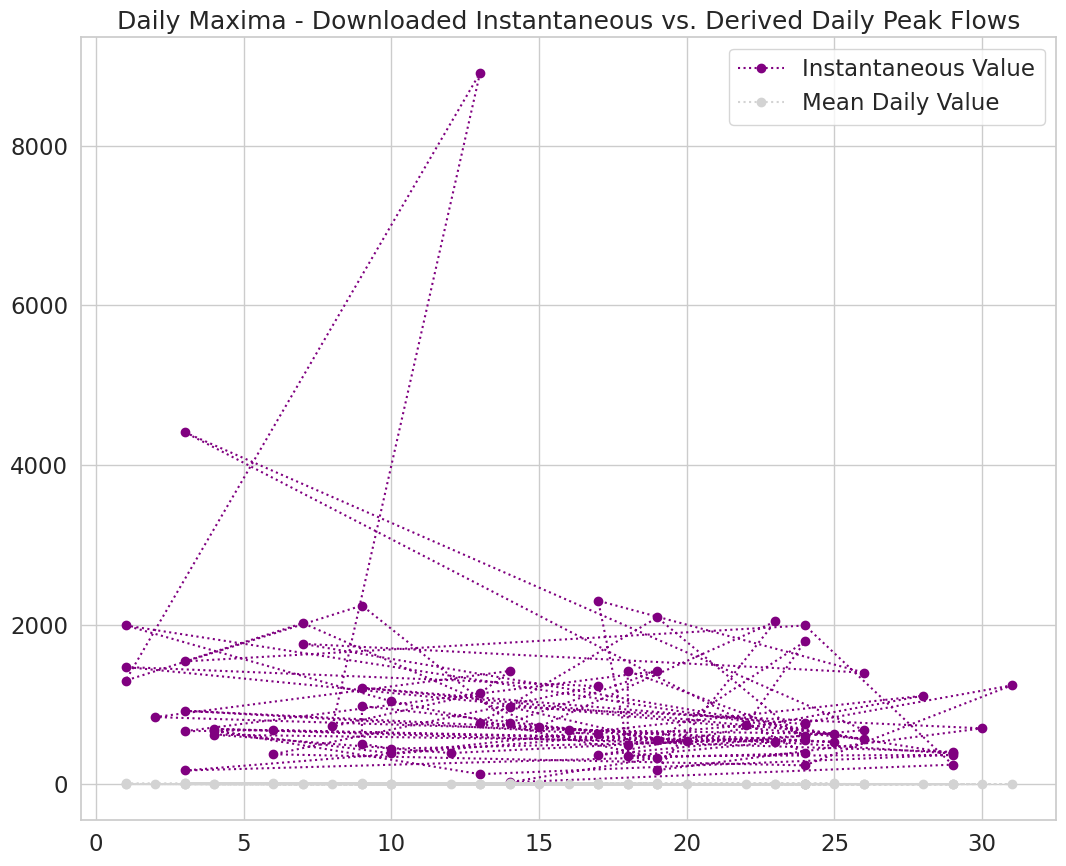

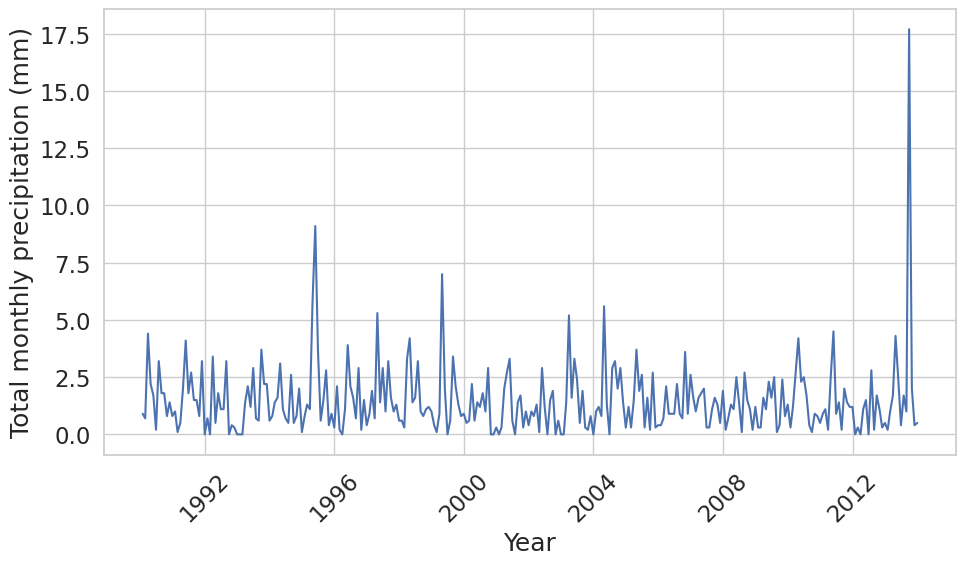

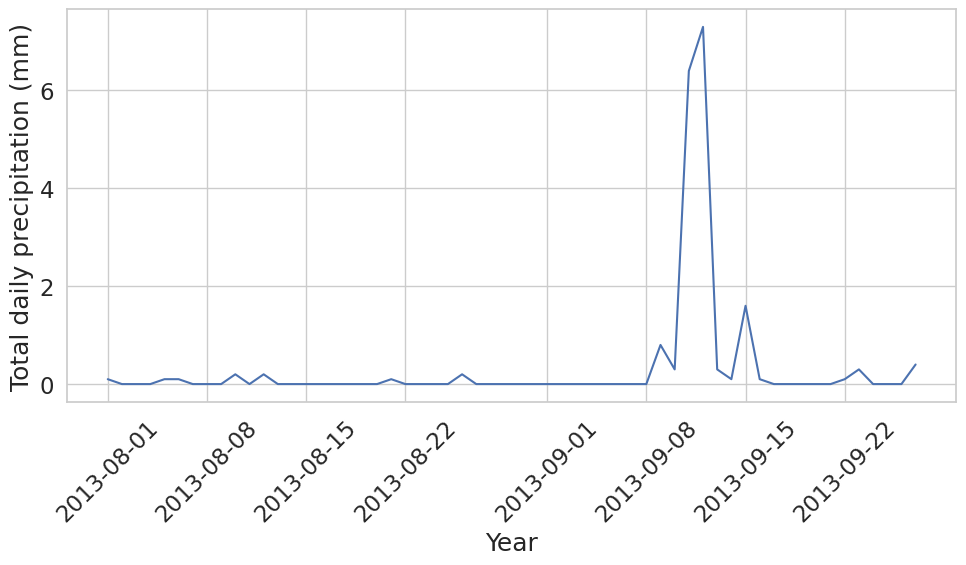

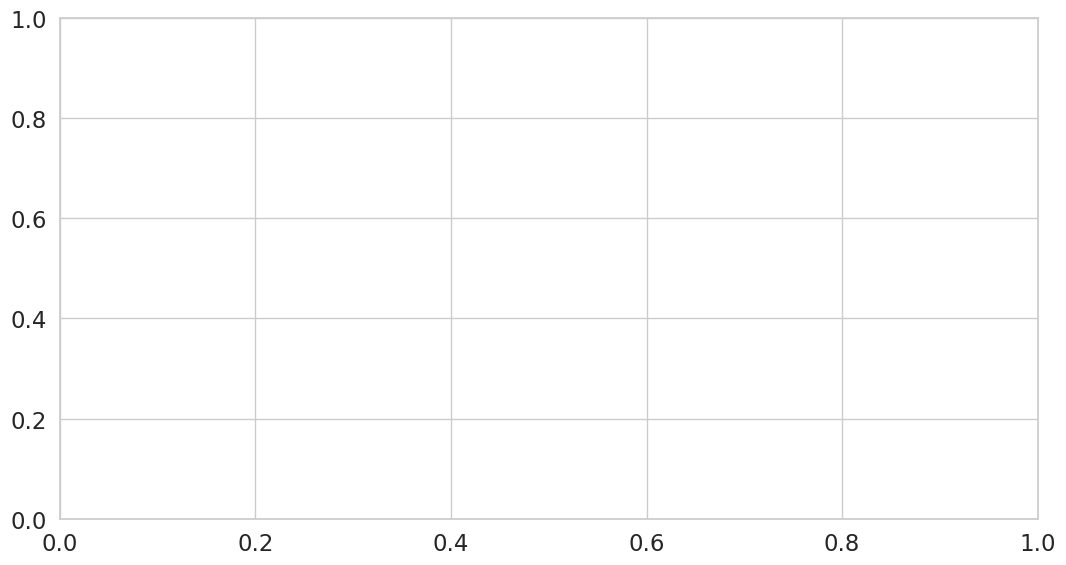

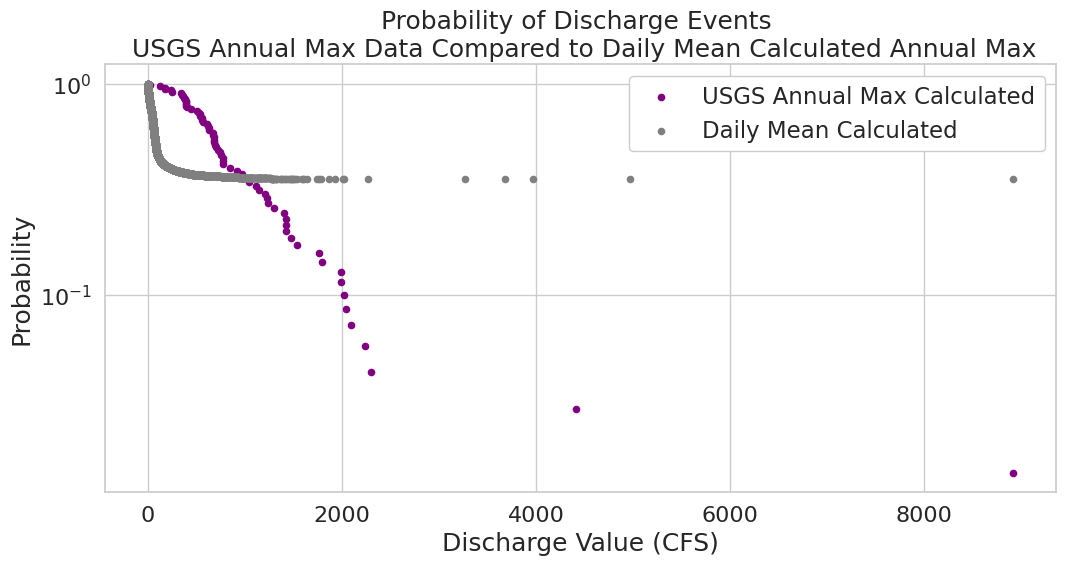

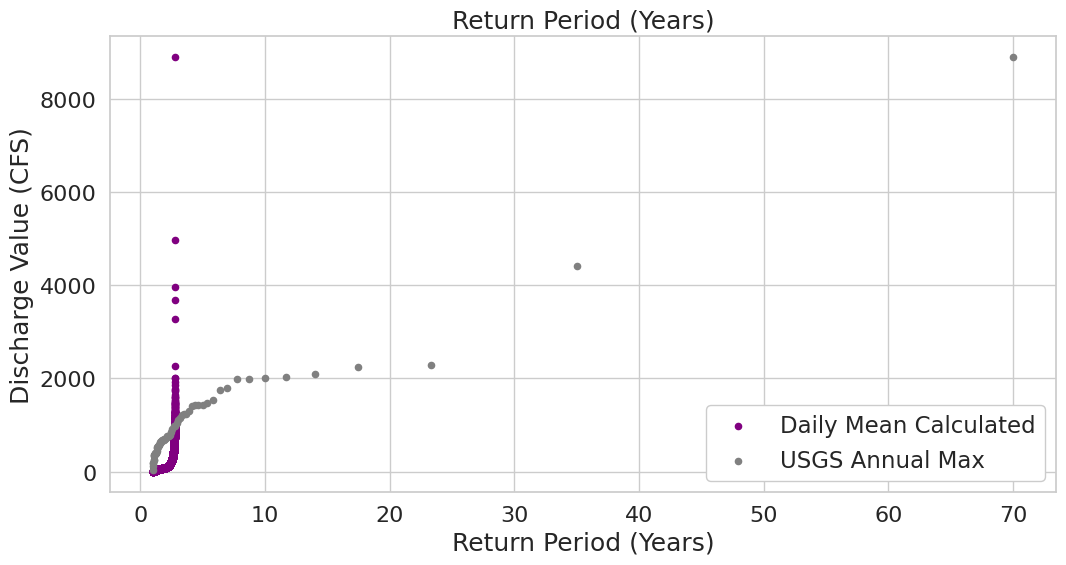

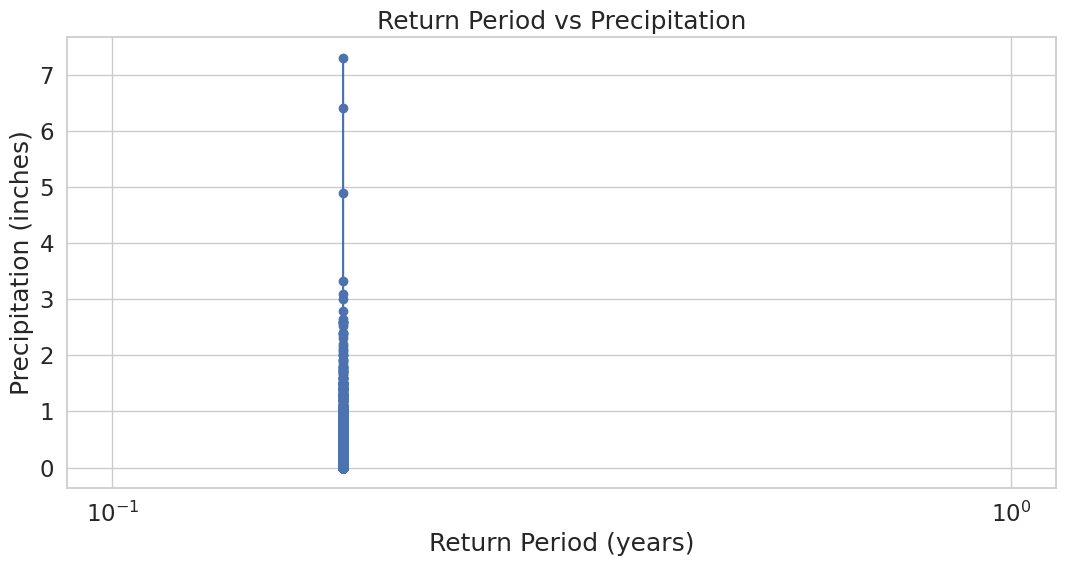

In [80]:
import matplotlib.pyplot as plt

# Plot the return period vs precipitation data
fig, ax = plt.subplots()
ax.plot(daily_sum_return['Return Period (years)'], precip_daily_sum['HPCP'], marker='o')
ax.set_xlabel('Return Period (years)')
ax.set_ylabel('Precipitation (inches)')
ax.set_xscale('log')
ax.set_title('Return Period vs Precipitation')
plt.show()

In [81]:
# Resample the precipitation data to annual max
precip_annual_max = precip_daily_sum.resample('Y').max()

# Calculate the return period and probability for the annual max data
annual_max_return = calculate_return(precip_annual_max['HPCP'])

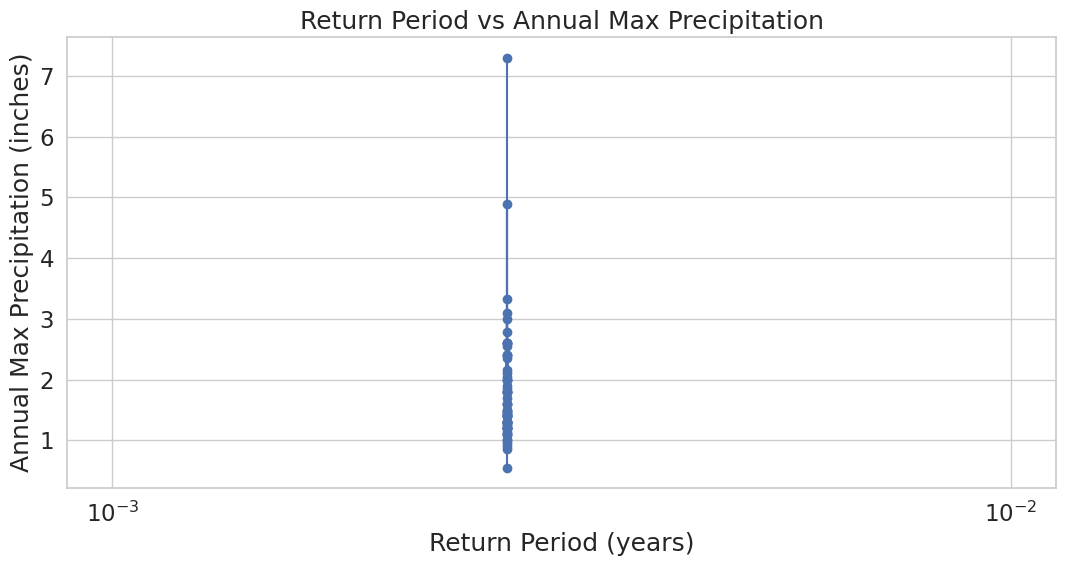

In [82]:
# Plot the return period vs annual max precipitation data
fig, ax = plt.subplots()
ax.plot(annual_max_return['Return Period (years)'], precip_annual_max['HPCP'], marker='o')
ax.set_xlabel('Return Period (years)')
ax.set_ylabel('Annual Max Precipitation (inches)')
ax.set_xscale('log')
ax.set_title('Return Period vs Annual Max Precipitation')
plt.show()

In [85]:

#precip_annual_max.head()
#tenho que juntar esses dois pandas para eu ter o HPCP junto com a precipatação a a probabilidade
merged = precip_annual_max.join(annual_max_return)
merged.head()

,HPCP,Return Period (years),Probability
DATE,,,
1948-12-31,0.55,0.002751,1.441676
1949-12-31,2.16,0.002751,1.441676
1950-12-31,2.00,0.002751,1.441676
1951-12-31,4.90,0.002751,1.441676
1952-12-31,1.84,0.002751,1.441676


Plot 6A
---
discharge of the x-axis and probability on the y-axis for each dataset (one plot)
plot the data on the y-axis on a log scale for best representation of differences in the data

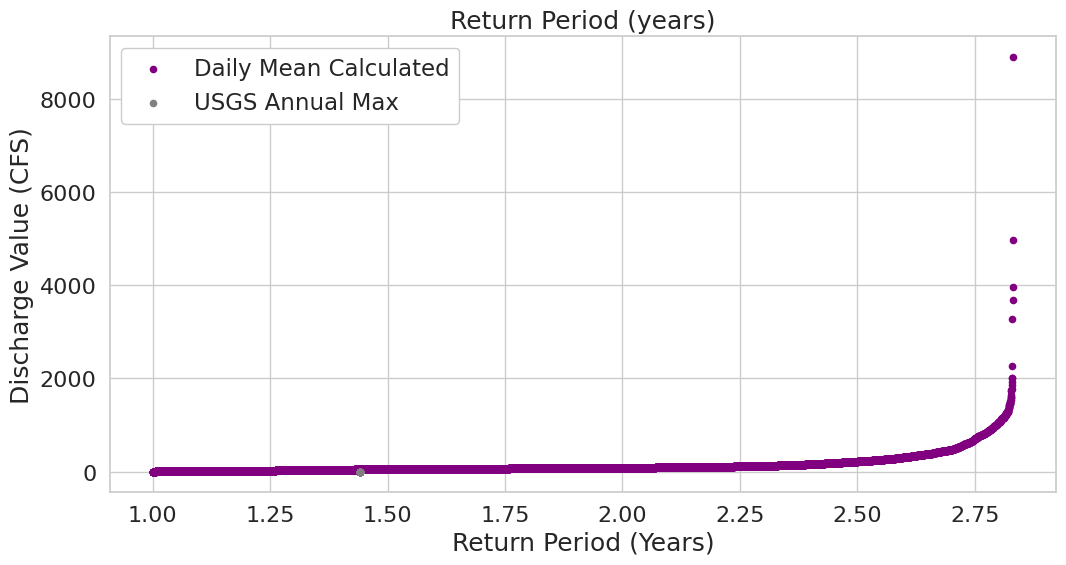

In [86]:
fig, ax = plt.subplots(figsize = (11,6) )
longmont_prob.plot.scatter(y ="discharge",
                         x="return-years",
                         title="Return Period (Years)",
                         ax=ax,
                         color='purple',
                         fontsize=16,
                         label="Daily Mean Calculated")
annual_max_return.plot.scatter(y ="Return Period (years)",
                              x="Probability",
                              title = "Return Period (years)",
                              ax=ax,
                              color='grey',
                              fontsize=16,
                              label="USGS Annual Max")
ax.legend(frameon = True,
          framealpha = 1)
ax.set_xlabel("Return Period (Years)")
ax.set_ylabel("Discharge Value (CFS)");
plt.show()


Plot 6B
---
Return period of the x-axis and Discharge (CFS) on the y-axis for each dataset (one plot)
plot the data on the y-axis on a log scale for best representation of differences in the data

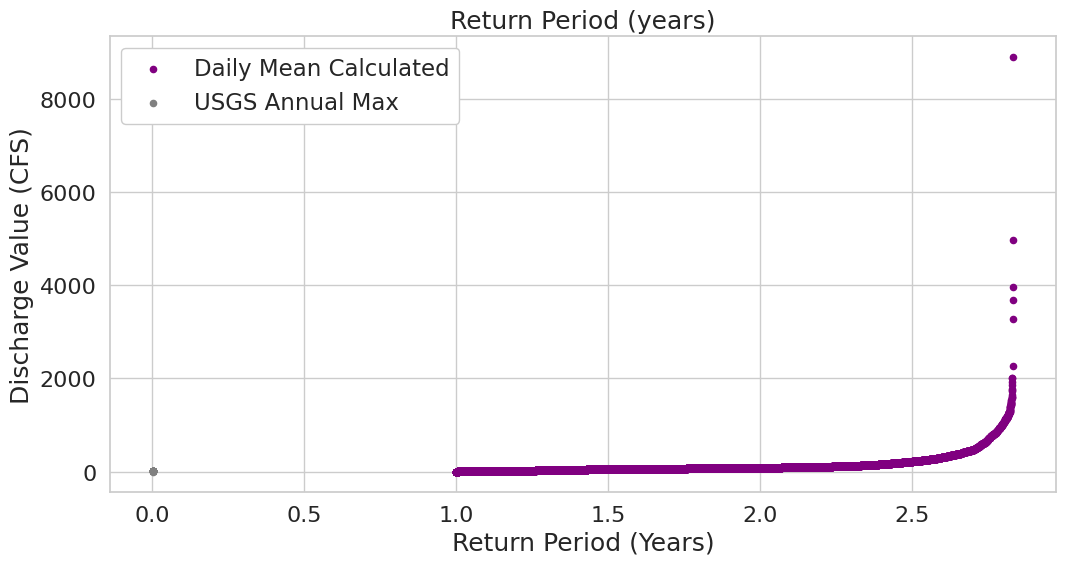

In [87]:
fig, ax = plt.subplots(figsize = (11,6) )
longmont_prob.plot.scatter(y ="discharge",
                         x="return-years",
                         title="Return Period (Years)",
                         ax=ax,
                         color='purple',
                         fontsize=16,
                         label="Daily Mean Calculated")
merged.plot.scatter(y ="HPCP",
                              x="Return Period (years)",
                              title = "Return Period (years)",
                              ax=ax,
                              color='grey',
                              fontsize=16,
                              label="USGS Annual Max")
ax.legend(frameon = True,
          framealpha = 1)
ax.set_xlabel("Return Period (Years)")
ax.set_ylabel("Discharge Value (CFS)");
plt.show()

